In [89]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsTransformer
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import os

In [90]:
#import data
print(os.getcwd())
dataset = pd.read_csv('dataset/epldata_final.csv')
dataset = dataset.dropna()
dataset['fpl_sel'] = dataset['fpl_sel'].map(lambda x: str(x)[:-1]).astype('float64')
print(np.sum(dataset.isnull()))

print(dataset.columns)

/Users/rushi/Documents/GitHub/market-value-prediction
name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64
Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')


In [91]:
#set x and y
x = dataset[['age_cat', 'club_id', 'big_club', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region']]
y = dataset[['market_value']].values.reshape(-1,1)

cross val score =  0.6833570077041518


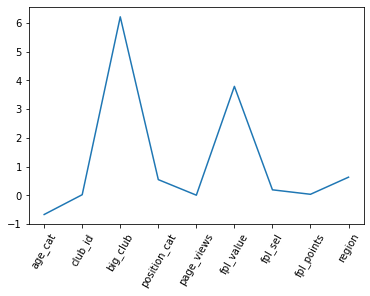

In [92]:
#create model

lasso = Lasso(alpha=0.01, normalize=True)
cvlasso = cross_val_score(lasso, x, y)
print("cross val score = ", np.mean(cvlasso))

cols = x.columns
cflasso = lasso.fit(x,y).coef_
s = sns.lineplot(x = cols, y = cflasso)
# s.set_xticklabels(cols, rotation=60)
s.tick_params(axis='x', rotation=60)